# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
  ```



In [87]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()



Using TensorFlow backend.


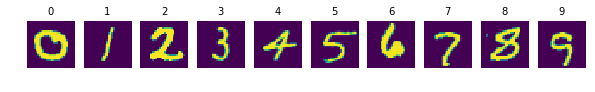

In [88]:
plt.figure(figsize=(10,1));

for num in range(0,10):
    index = np.random.choice(np.where(y_train == num)[0])
    image = x_train[index]

    plt.subplot(1, 10, num +1)
    plt.imshow(image, shape=(12, 10))
    plt.axis('off');
    plt.title(num, fontsize=10)

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
y = argmax P(x/y)
     y in Y

Paramaters estimation:
    calculate for each pixel its probability to be 1 or zero for each digit
    if pixel never was 1 or zero for some digit it will get low probability(instead of zero)

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

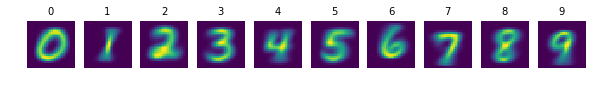

In [89]:
#mean image 
plt.figure(figsize=(10,1))

for num in range(0,10):
    current_num_train_examples = x_train[np.where(y_train == num)]
    avg_image = np.mean(current_num_train_examples, axis=0)
    
    plt.subplot(1, 10, num +1)
    plt.imshow(avg_image, shape=(12, 10))
    plt.axis('off');
    plt.title(num, fontsize=10)
    
    

In [90]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.84130000000000005

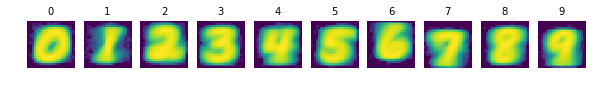

In [91]:

plt.figure(figsize=(10,1))

for num in range(0,10):
    generated_image = clf.feature_log_prob_[num].reshape(28,28)
    
    plt.subplot(1, 10, num +1)
    plt.imshow(generated_image, shape=(12, 10))
    plt.axis('off');
    plt.title(num, fontsize=10)


Test Accuracy: 0.8413


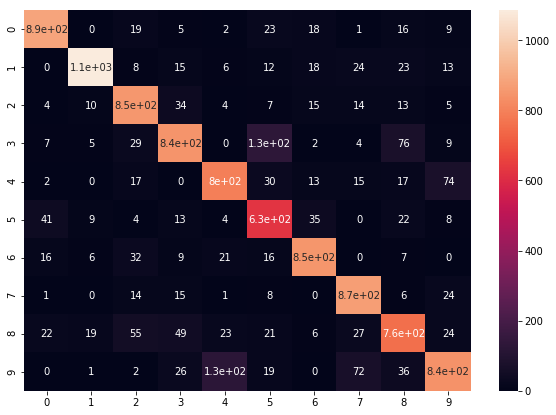

In [92]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
test_predictions = clf.predict(x_test)
cm = confusion_matrix(test_predictions, y_test)
  
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)],
                    columns = range(0,10))

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)


print('Test Accuracy: {0}'.format(np.sum(test_predictions == y_test)/(len(y_test) * 1.0)))


## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words. 

Bonus: How can you correct the analyzed error? 

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

In [93]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
news_ds = fetch_20newsgroups(subset='train', shuffle=True, random_state=999)
x_train = news_ds.data
y_train = news_ds.target 


vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(x_train)
X.shape

(11314, 129796)

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import math
from scipy.sparse import coo_matrix

class NaiveBayes(BaseEstimator, ClassifierMixin):

  def __init__(self, alpha=1.0):
    self.alpha = alpha if alpha is not  None else 0.0
    self.prior = {}
    self.cond_prob = None
    self.vocabulary = None
    self.categoty_total_words = None

  def fit(self, x, y):
    self.vocabulary = CountVectorizer(stop_words='english', lowercase=True)

    X = self.vocabulary.fit_transform(x, y)

    #prior
    unique_labels, labels_counter = np.unique(y, return_counts=True)
    self._total = np.sum(labels_counter, dtype=float)
    for label, count in zip(unique_labels, labels_counter):
        self.prior[label] = count/self._total


    rows = X.toarray()

    words_category_occurences = np.zeros(shape=(len(unique_labels), rows.shape[1]), dtype=float)

    for row_index, row in enumerate(rows):
        category_index = y[row_index]
        words_category_occurences[category_index] += row

    words_category_occurences = words_category_occurences+ self.alpha

    self.categoty_total_words = words_category_occurences.sum(axis=1)

    sum_word_occurrences_foreach_category = self.categoty_total_words.reshape(20, 1)

    self.cond_prob = words_category_occurences / sum_word_occurrences_foreach_category



  def predict_log_proba(self, x):
      all_data = self.vocabulary.transform(x)
      documentWords = {}

      cx = coo_matrix(all_data)

      for doc, word, word_count in zip(cx.row, cx.col, cx.data):
          if doc not in documentWords:
              documentWords[doc] = []
          documentWords[doc].append((word, word_count))

      log_probs = []
      for doc_number in range(0, len(x)):

          current_doc_log_probs = []
          log_probs.append(current_doc_log_probs)
          if doc_number not in documentWords:
              current_doc_log_probs.extend([-1] * len(self.prior))
              continue

          words_and_counts = documentWords[doc_number]

          for category, prior_prob in self.prior.items():
              score = math.log(prior_prob)
              word_prob_in_category = self.cond_prob[category]
              for feature, count in words_and_counts:
                  log_prob = math.log(word_prob_in_category[feature]) * count
                  score += log_prob

              current_doc_log_probs.append(score)

            
      return log_probs

  def predict(self, x):
      log_probs = self.predict_log_proba(x)

      return np.argmax(log_probs, axis=1)
    


In [95]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

news_ds = fetch_20newsgroups(subset='train', shuffle=True, random_state=999,
                                 remove=('headers', 'footers', 'quotes'))
x_train = news_ds.data
y_train = news_ds.target

nb = NaiveBayes(0.07)
nb.fit(x_train, y_train)

test_news_ds = fetch_20newsgroups(subset='test', shuffle=True, random_state=999,
                                 remove=('headers', 'footers', 'quotes'))
x_test = test_news_ds.data
y_test = test_news_ds.target
y_ = nb.predict(x_test)

print('accuracy_score = {0}'.format(accuracy_score(y_test, y_, normalize=True, sample_weight=None)))

print(classification_report(y_test, y_, target_names=news_ds.target_names))

accuracy_score = 0.659187466808
                          precision    recall  f1-score   support

             alt.atheism       0.31      0.56      0.40       319
           comp.graphics       0.56      0.72      0.63       389
 comp.os.ms-windows.misc       0.50      0.01      0.01       394
comp.sys.ibm.pc.hardware       0.52      0.72      0.60       392
   comp.sys.mac.hardware       0.60      0.70      0.65       385
          comp.windows.x       0.75      0.73      0.74       395
            misc.forsale       0.82      0.71      0.76       390
               rec.autos       0.72      0.74      0.73       396
         rec.motorcycles       0.75      0.74      0.75       398
      rec.sport.baseball       0.91      0.80      0.85       397
        rec.sport.hockey       0.97      0.85      0.91       399
               sci.crypt       0.75      0.74      0.75       396
         sci.electronics       0.67      0.56      0.61       393
                 sci.med       0.82      0.

In [96]:
from sklearn.naive_bayes import MultinomialNB
sk_clf = MultinomialNB(alpha = 0.07)

nb.fit(x_train, y_train)

y_ = nb.predict(x_test)

accuracy_score(y_test, y_, normalize=True, sample_weight=None)

0.65918746680828466

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english', lowercase=True)),
    ('clf', MultinomialNB(alpha=0.007))
])

pipe.fit(x_train, y_train)

y_ = pipe.predict(x_test)

accuracy_score(y_test, y_, normalize=True, sample_weight=None)



0.69662772172065857

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('vect', TfidfVectorizer( min_df=2, 
                              max_df=0.96,
                              use_idf = True,
                             max_features=90000,
                              stop_words='english')),
    ('clf', MultinomialNB(alpha=0.09))
])


pipe.fit(x_train, y_train)

y_ = pipe.predict(x_test)

accuracy_score(y_test, y_, normalize=True, sample_weight=None)


0.7023366967604886